In [29]:
import matplotlib.pyplot as plt
import numpy as np
import json
import matplotlib as mpl
from cycler import cycler

wong_colors = {
    "red": "#D55E00",
    "dark_blue": "#0072B2",
    "orange": "#E69F00",
    "purple": "#CC79A7",
    "light_blue": "#56B4E9",
    "green": "#009E73",
    "black": "#000000",
    "yellow": "#F0E442",
}

wong_cycle = cycler(color=[color for color in wong_colors.values()])

mpl.rcParams["axes.prop_cycle"] = wong_cycle
# mpl.rcParams['font.family'] = 'sans-serif'
# mpl.rcParams['font.sans-serif'] = "Lato",
mpl.rcParams["axes.titleweight"] = "bold"
mpl.rcParams["axes.labelweight"] = "bold"
# mpl.rcParams["figure.autolayout"]  True
mpl.rcParams["figure.constrained_layout.use"] = True

In [2]:
with open("data/formation_energies.json", "r") as f:
    macrocycles = json.load(f)

mols = [n for n in macrocycles.keys()]

In [3]:
functionals =[
    # 'B97-3c',
    'M06-2X', 
    'PBE0', 
    'PW6B95', 
    'ωB97M-V', 
    'ωB97X-D3', 
    'ωB97X-V'
]

def _get_energies(e_label, smd):
    energies = {f: []for f in functionals}
    for mol in mols:
        for funct, es in macrocycles[mol].items():
            if not smd:
                # if funct == "B97-3c (Eh)":
                #     energies["B97-3c"].append(es[e_label])
                if funct == "PBE0-D3BJ/def2-QZVP":
                    energies["PBE0"].append(es[e_label])
                elif funct == "PW6B95-D3BJ/def2-QZVP":
                    energies["PW6B95"].append(es[e_label])
                elif funct == "M062X-D3ZERO/def2-QZVP":
                    energies["M06-2X"].append(es[e_label])
                elif funct == "wB97X-D3BJ/def2-QZVP":
                    energies["ωB97X-D3"].append(es[e_label])
                elif funct == "wB97X-V/def2-QZVP":
                    energies["ωB97X-V"].append(es[e_label])
                elif funct == "wB97M-V/def2-QZVP":
                    energies["ωB97M-V"].append(es[e_label])
            else:
                # if funct == "B97-3c (Eh)":
                #     energies["B97-3c"].append(es[e_label])
                if funct == "PBE0-D3BJ-CHLOROFORM/def2-QZVP":
                    energies["PBE0"].append(es[e_label])
                elif funct == "PW6B95-D3BJ-CHLOROFORM/def2-QZVP":
                    energies["PW6B95"].append(es[e_label])
                elif funct == "M062X-D3ZERO-CHLOROFORM/def2-QZVP":
                    energies["M06-2X"].append(es[e_label])
                elif funct == "wB97X-D3BJ-CHLOROFORM/def2-QZVP":
                    energies["ωB97X-D3"].append(es[e_label])
                elif funct == "wB97X-V-CHLOROFORM/def2-QZVP":
                    energies["ωB97X-V"].append(es[e_label])
                elif funct == "wB97M-V-CHLOROFORM/def2-QZVP":
                    energies["ωB97M-V"].append(es[e_label])
    return energies


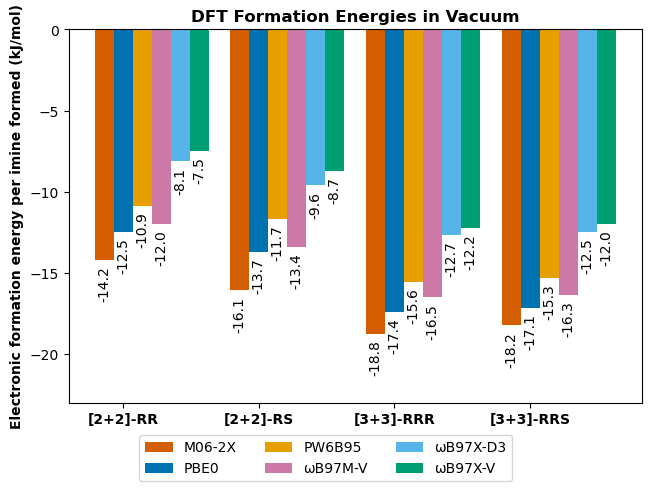

In [27]:
energies = _get_energies(e_label="Formation energy per imine (kJ/mol)", smd=False)

x = np.arange(len(mols))
width = 0.14
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for functional, energy in energies.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, energy, width, label=functional)
    z = ax.bar_label(rects, padding=4, rotation=90, size=10, fmt="%.1f")
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Electronic formation energy per imine formed (kJ/mol)')
ax.set_title('DFT Formation Energies in Vacuum')
ax.set_xticks(x + width, mols, weight="bold")
fig.legend(loc="outside lower center", ncols=3)
ax.set_ylim(-23, 0)

plt.show()

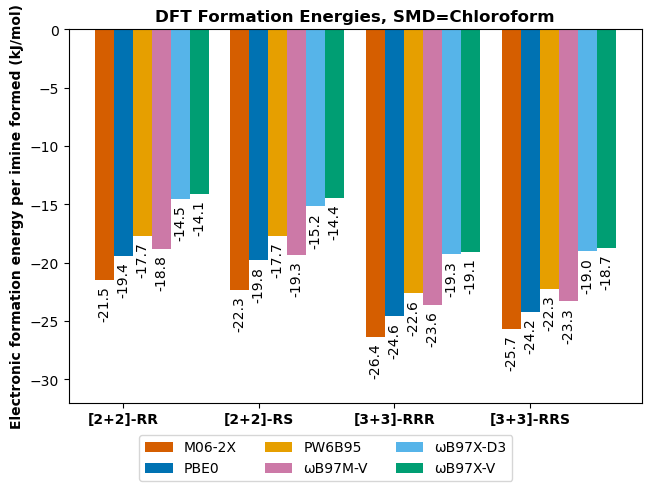

In [28]:
energies = _get_energies(e_label="Formation energy per imine (kJ/mol)", smd=True)

x = np.arange(len(mols))
width = 0.14
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for functional, energy in energies.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, energy, width, label=functional)
    z = ax.bar_label(rects, padding=4, rotation=90, size=10, fmt="%.1f")
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Electronic formation energy per imine formed (kJ/mol)')
ax.set_title('DFT Formation Energies, SMD=Chloroform')
ax.set_xticks(x + width, mols, weight="bold")
fig.legend(loc="outside lower center", ncols=3)
ax.set_ylim(-32, 0)

plt.show()

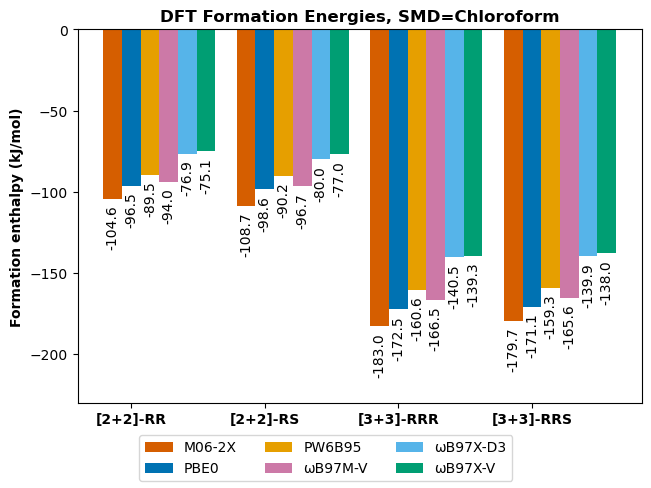

In [11]:
energies = _get_energies(e_label="Formation enthalpy (kJ/mol)", smd=True)

x = np.arange(len(mols))
width = 0.14
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for functional, energy in energies.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, energy, width, label=functional)
    z = ax.bar_label(rects, padding=4, rotation=90, size=10, fmt="%.1f")
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Formation enthalpy (kJ/mol)')
ax.set_title('DFT Formation Energies, SMD=Chloroform')
ax.set_xticks(x + width, mols, weight="bold")
fig.legend(loc="outside lower center", ncols=3)
ax.set_ylim(-230, 0)

plt.show()

# Ca. 25 kJ/mol per imine vs 30 kJ/mol per imine

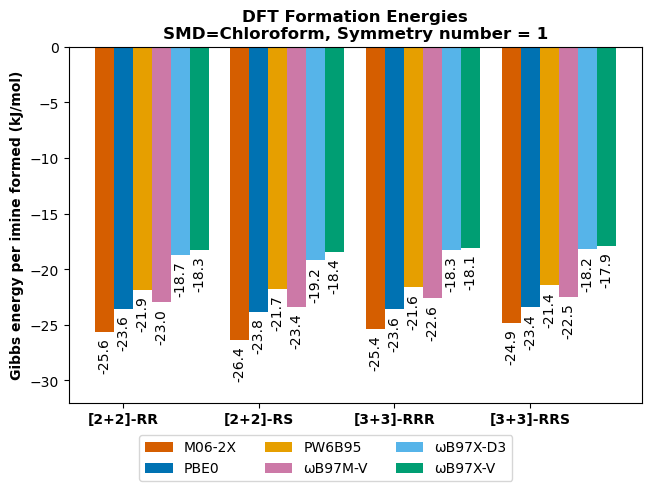

In [60]:
energies = _get_energies(e_label="Formation Gibbs energy per imine, sn=1 (kJ/mol)", smd=True)

x = np.arange(len(mols))
width = 0.14
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for functional, energy in energies.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, energy, width, label=functional)
    z = ax.bar_label(rects, padding=4, rotation=90, size=10, fmt="%.1f")
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Gibbs energy per imine formed (kJ/mol)')
ax.set_title('DFT Formation Energies\nSMD=Chloroform, Symmetry number = 1')
ax.set_xticks(x + width, mols, weight="bold")
fig.legend(loc="outside lower center", ncols=3)
ax.set_ylim(-32, 0)

plt.show()

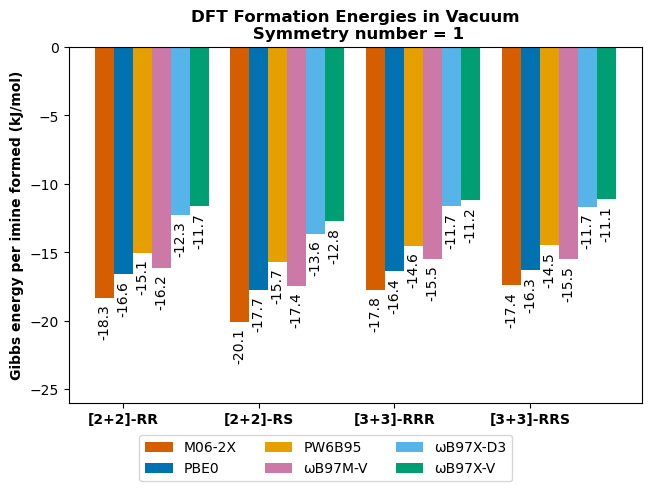

In [62]:
energies = _get_energies(e_label="Formation Gibbs energy per imine, sn=1 (kJ/mol)", smd=False)

x = np.arange(len(mols))
width = 0.14
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for functional, energy in energies.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, energy, width, label=functional)
    z = ax.bar_label(rects, padding=4, rotation=90, size=10, fmt="%.1f")
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Gibbs energy per imine formed (kJ/mol)')
ax.set_title('DFT Formation Energies in Vacuum\n Symmetry number = 1')
ax.set_xticks(x + width, mols, weight="bold")
fig.legend(loc="outside lower center", ncols=3)
ax.set_ylim(-26, 0)

plt.show()

In [12]:
functionals =[
    # 'B97-3c',
    'M06-2X', 
    'PBE0', 
    'PW6B95', 
    'ωB97M-V', 
    'ωB97X-D3', 
    'ωB97X-V'
]

def _get_gibbs_symmetry_per_imine(smd, flat=True):
    energies = {f: []for f in functionals}
    for mol in mols:
        if mol == "[2+2]-RR":
            e_label = f"Formation Gibbs energy per imine, sn={4 if flat else 2} (kJ/mol)"
        elif mol == "[2+2]-RS":
            e_label = "Formation Gibbs energy per imine, sn=2 (kJ/mol)"
        elif mol == "[3+3]-RRR":
            e_label = f"Formation Gibbs energy per imine, sn={6 if flat else 3} (kJ/mol)"
        elif mol == "[3+3]-RRS":
            e_label = "Formation Gibbs energy per imine, sn=2 (kJ/mol)"
        for funct, es in macrocycles[mol].items():
            if not smd:
                # if funct == "B97-3c (Eh)":
                #     energies["B97-3c"].append(es[e_label])
                if funct == "PBE0-D3BJ/def2-QZVP":
                    energies["PBE0"].append(es[e_label])
                elif funct == "PW6B95-D3BJ/def2-QZVP":
                    energies["PW6B95"].append(es[e_label])
                elif funct == "M062X-D3ZERO/def2-QZVP":
                    energies["M06-2X"].append(es[e_label])
                elif funct == "wB97X-D3BJ/def2-QZVP":
                    energies["ωB97X-D3"].append(es[e_label])
                elif funct == "wB97X-V/def2-QZVP":
                    energies["ωB97X-V"].append(es[e_label])
                elif funct == "wB97M-V/def2-QZVP":
                    energies["ωB97M-V"].append(es[e_label])
            else:
                # if funct == "B97-3c (Eh)":
                #     energies["B97-3c"].append(es[e_label])
                if funct == "PBE0-D3BJ-CHLOROFORM/def2-QZVP":
                    energies["PBE0"].append(es[e_label])
                elif funct == "PW6B95-D3BJ-CHLOROFORM/def2-QZVP":
                    energies["PW6B95"].append(es[e_label])
                elif funct == "M062X-D3ZERO-CHLOROFORM/def2-QZVP":
                    energies["M06-2X"].append(es[e_label])
                elif funct == "wB97X-D3BJ-CHLOROFORM/def2-QZVP":
                    energies["ωB97X-D3"].append(es[e_label])
                elif funct == "wB97X-V-CHLOROFORM/def2-QZVP":
                    energies["ωB97X-V"].append(es[e_label])
                elif funct == "wB97M-V-CHLOROFORM/def2-QZVP":
                    energies["ωB97M-V"].append(es[e_label])
    return energies


In [13]:
functionals =[
    # 'B97-3c',
    'M06-2X', 
    'PBE0', 
    'PW6B95', 
    'ωB97M-V', 
    'ωB97X-D3', 
    'ωB97X-V'
]

def _get_gibbs_symmetry(smd, flat=True):
    energies = {f: []for f in functionals}
    for mol in mols:
        if mol == "[2+2]-RR":
            e_label = f"Formation Gibbs energy, sn={4 if flat else 2} (kJ/mol)"
        elif mol == "[2+2]-RS":
            e_label = "Formation Gibbs energy, sn=2 (kJ/mol)"
        elif mol == "[3+3]-RRR":
            e_label = f"Formation Gibbs energy, sn={6 if flat else 3} (kJ/mol)"
        elif mol == "[3+3]-RRS":
            e_label = "Formation Gibbs energy, sn=2 (kJ/mol)"
        for funct, es in macrocycles[mol].items():
            if not smd:
                # if funct == "B97-3c (Eh)":
                #     energies["B97-3c"].append(es[e_label])
                if funct == "PBE0-D3BJ/def2-QZVP":
                    energies["PBE0"].append(es[e_label])
                elif funct == "PW6B95-D3BJ/def2-QZVP":
                    energies["PW6B95"].append(es[e_label])
                elif funct == "M062X-D3ZERO/def2-QZVP":
                    energies["M06-2X"].append(es[e_label])
                elif funct == "wB97X-D3BJ/def2-QZVP":
                    energies["ωB97X-D3"].append(es[e_label])
                elif funct == "wB97X-V/def2-QZVP":
                    energies["ωB97X-V"].append(es[e_label])
                elif funct == "wB97M-V/def2-QZVP":
                    energies["ωB97M-V"].append(es[e_label])
            else:
                # if funct == "B97-3c (Eh)":
                #     energies["B97-3c"].append(es[e_label])
                if funct == "PBE0-D3BJ-CHLOROFORM/def2-QZVP":
                    energies["PBE0"].append(es[e_label])
                elif funct == "PW6B95-D3BJ-CHLOROFORM/def2-QZVP":
                    energies["PW6B95"].append(es[e_label])
                elif funct == "M062X-D3ZERO-CHLOROFORM/def2-QZVP":
                    energies["M06-2X"].append(es[e_label])
                elif funct == "wB97X-D3BJ-CHLOROFORM/def2-QZVP":
                    energies["ωB97X-D3"].append(es[e_label])
                elif funct == "wB97X-V-CHLOROFORM/def2-QZVP":
                    energies["ωB97X-V"].append(es[e_label])
                elif funct == "wB97M-V-CHLOROFORM/def2-QZVP":
                    energies["ωB97M-V"].append(es[e_label])
    return energies


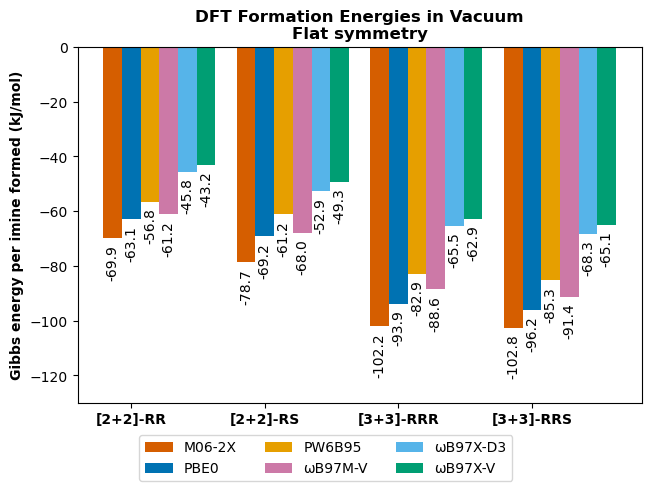

In [20]:
energies = _get_gibbs_symmetry(smd=False, flat=True)

x = np.arange(len(mols))
width = 0.14
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for functional, energy in energies.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, energy, width, label=functional)
    z = ax.bar_label(rects, padding=4, rotation=90, size=10, fmt="%.1f")
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Gibbs energy per imine formed (kJ/mol)')
ax.set_title('DFT Formation Energies in Vacuum\nFlat symmetry')
ax.set_xticks(x + width, mols, weight="bold")
fig.legend(loc="outside lower center", ncols=3)
ax.set_ylim(-130, 0)

plt.show()

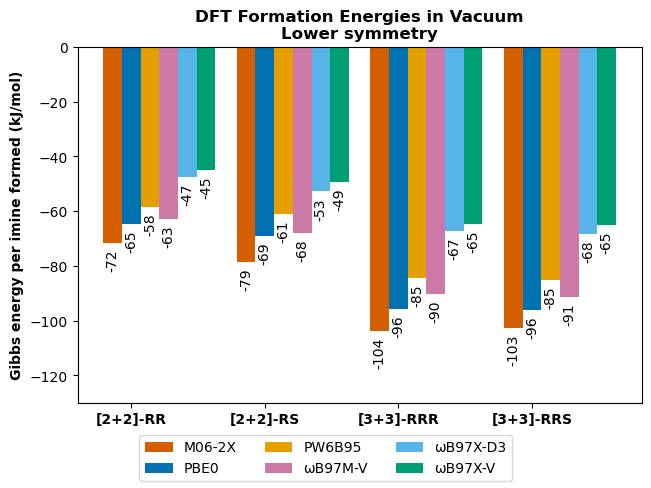

In [26]:
energies = _get_gibbs_symmetry(smd=False, flat=False)

x = np.arange(len(mols))
width = 0.14
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for functional, energy in energies.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, energy, width, label=functional)
    z = ax.bar_label(rects, padding=4, rotation=90, size=10, fmt="%.0f")
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Gibbs energy per imine formed (kJ/mol)')
ax.set_title('DFT Formation Energies in Vacuum\nLower symmetry')
ax.set_xticks(x + width, mols, weight="bold")
fig.legend(loc="outside lower center", ncols=3)
ax.set_ylim(-130, 0)

plt.show()

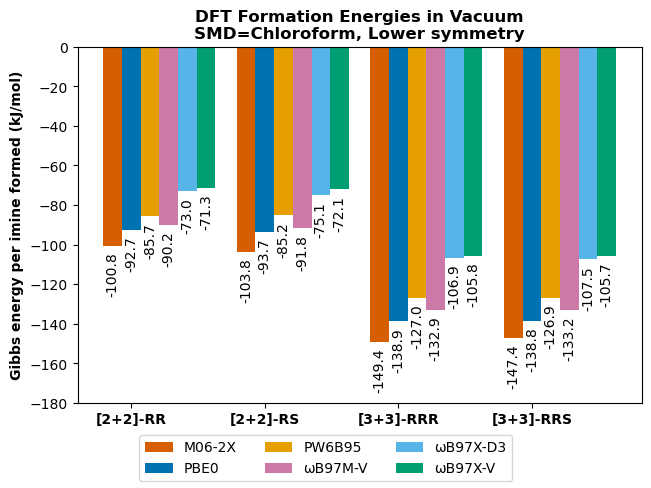

In [24]:
energies = _get_gibbs_symmetry(smd=True, flat=False)

x = np.arange(len(mols))
width = 0.14
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for functional, energy in energies.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, energy, width, label=functional)
    z = ax.bar_label(rects, padding=4, rotation=90, size=10, fmt="%.1f")
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Gibbs energy per imine formed (kJ/mol)')
ax.set_title('DFT Formation Energies in Vacuum\nSMD=Chloroform, Lower symmetry')
ax.set_xticks(x + width, mols, weight="bold")
fig.legend(loc="outside lower center", ncols=3)
ax.set_ylim(-180, 0)

plt.show()

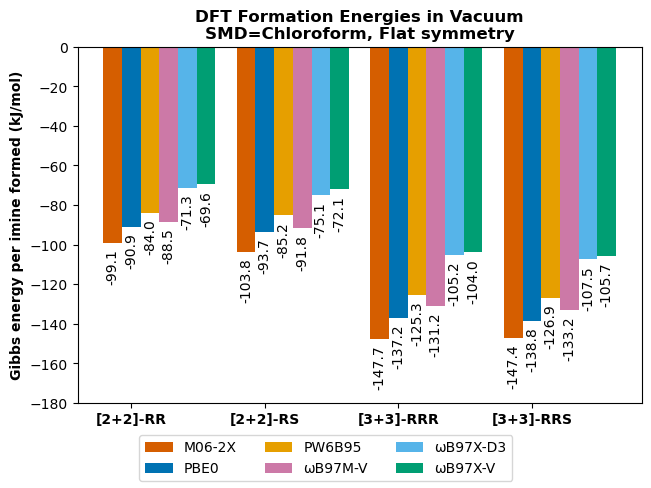

In [25]:
energies = _get_gibbs_symmetry(smd=True, flat=True)

x = np.arange(len(mols))
width = 0.14
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for functional, energy in energies.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, energy, width, label=functional)
    z = ax.bar_label(rects, padding=4, rotation=90, size=10, fmt="%.1f")
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Gibbs energy per imine formed (kJ/mol)')
ax.set_title('DFT Formation Energies in Vacuum\nSMD=Chloroform, Flat symmetry')
ax.set_xticks(x + width, mols, weight="bold")
fig.legend(loc="outside lower center", ncols=3)
ax.set_ylim(-180, 0)

plt.show()